In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.corr()["Sales"]

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
y,X= df["Sales"], df.drop(["Sales"], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=101)

In [8]:
RTR= RandomForestRegressor()
model= RTR.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
r2_score(y_test, y_pred)

0.9787736131140418

In [11]:
mean_squared_error(y_test, y_pred)**0.5

0.7741232675312988

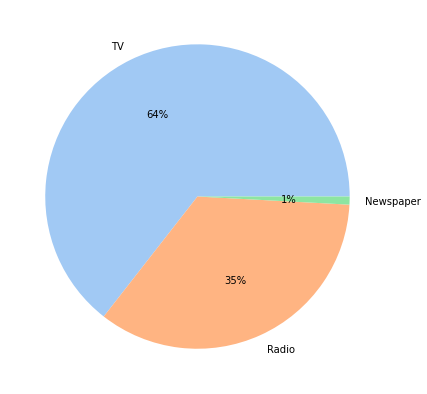

In [21]:
importance= RTR.feature_importances_
labels = ["TV", "Radio", "Newspaper"]
plt.figure(figsize=(7,7))
pc = sns.color_palette('pastel')
plt.pie(importance, labels = labels, colors= pc,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

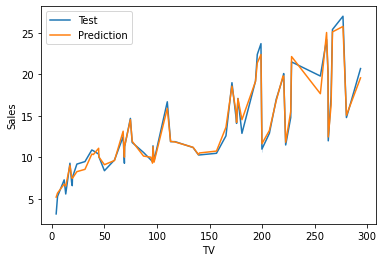

In [25]:
import seaborn as sns

sns.lineplot(data=X_test, x="TV", y=y_test, label="Test")
sns.lineplot(data=X_test, x="TV", y=y_pred, label="Prediction")

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

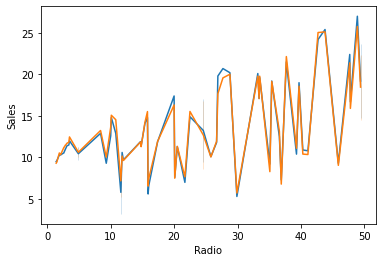

In [23]:
sns.lineplot(data=X_test, x="Radio", y=y_test)
sns.lineplot(data=X_test, x="Radio", y=y_pred)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

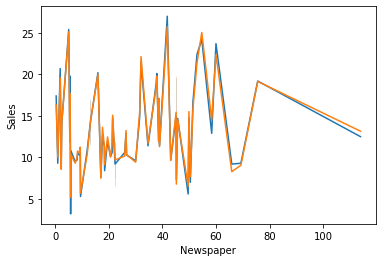

In [24]:
sns.lineplot(data=X_test, x="Newspaper", y=y_test)
sns.lineplot(data=X_test, x="Newspaper", y=y_pred)